In [44]:

import sys
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [45]:

df_poet = pd.read_csv("poet.log", delimiter=" ",
                      skipinitialspace=True).groupby("HB_NUM").first()
df_heartbeats = pd.read_csv(
    "heartbeat.log", delimiter=" ", skipinitialspace=True, index_col="Beat")
df_poet

,HB_RATE,X_HAT_MINUS,X_HAT,P_MINUS,H,K,P,SPEEDUP,ERROR,WORKLOAD,LOWER_ID,UPPER_ID,NUM_HBS
HB_NUM,,,,,,,,,,,,,
70000,825.103210,0.200000,0.200000,1.000010,-0.000000,-0.000000,1.000010,1.000000,-475.103210,5.000000,4,2,0
80000,757.621155,0.200000,750.122084,1.000020,1.000000,0.990099,0.009901,1.000000,-407.621155,0.001333,4,2,0
350000,84.550514,794.696181,616.979832,0.003338,1.000000,0.250253,0.002503,1.430240,265.449486,0.001621,4,2,0
650000,78.707855,616.979832,426.209052,0.002513,1.430240,0.237359,0.001660,2.066764,271.292145,0.002346,4,2,0
950000,73.642532,426.209052,263.618007,0.001670,2.066764,0.201418,0.000975,3.115089,276.357468,0.003793,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297190000,362.813995,224.880496,222.716096,0.000194,1.893219,0.034392,0.000182,1.835684,-12.813995,0.004490,4,2,0
297490000,370.044891,222.716096,221.434125,0.000192,1.835684,0.033048,0.000180,1.745161,-20.044891,0.004516,4,2,0
297790000,369.687592,221.434125,220.909012,0.000190,1.745161,0.031349,0.000180,1.656040,-19.687592,0.004527,4,2,0


In [46]:
df_hb_mean = df_heartbeats.groupby("Tag").mean()
df_hb_mean

,Timestamp,Global_Rate,Window_Rate,Instant_Rate,Global_Accuracy,Window_Accuracy,Instant_Accuracy,Global_Power,Window_Power,Instant_Power
Tag,,,,,,,,,,
0,1.637276e+18,26433.348312,13216.673828,13216.674156,1.0,1.0,1.0,0.000000,0.000000,0.000000
10000,1.637276e+18,820.688263,637.589073,16903.160669,1.0,1.0,1.0,28.463967,28.463967,7.288987
20000,1.637276e+18,822.396251,725.578141,38286.773986,1.0,1.0,1.0,30.917500,30.917500,8.774090
30000,1.637276e+18,815.135244,749.916092,81945.237663,1.0,1.0,1.0,31.439267,31.439267,8.299594
40000,1.637276e+18,810.616452,761.482712,137489.402092,1.0,1.0,1.0,31.806174,31.806174,8.320455
...,...,...,...,...,...,...,...,...,...,...
298430000,1.637276e+18,338.423879,368.096344,375.717950,1.0,1.0,1.0,19.207677,19.313976,14.607686
298440000,1.637276e+18,338.424993,368.346466,376.129611,1.0,1.0,1.0,19.207755,19.335342,21.855187
298450000,1.637276e+18,338.426045,368.420837,373.803129,1.0,1.0,1.0,19.207825,19.570109,21.560300


In [47]:

df = df_poet.join(df_hb_mean)
df["Timestamp"] = pd.to_datetime(df["Timestamp"] -df["Timestamp"].iloc[0])
df = df.iloc[5:]
df

,HB_RATE,X_HAT_MINUS,X_HAT,P_MINUS,H,K,P,SPEEDUP,ERROR,WORKLOAD,...,Timestamp,Global_Rate,Window_Rate,Instant_Rate,Global_Accuracy,Window_Accuracy,Instant_Accuracy,Global_Power,Window_Power,Instant_Power
HB_NUM,,,,,,,,,,,,,,,,,,,,,
1250000,129.650558,263.618007,155.151161,0.000985,3.115089,0.156848,0.000504,4.487371,220.349442,0.006445,...,1970-01-01 00:00:01.375364352,107.408443,131.778793,11203.049886,1.0,1.0,1.0,17.800348,17.049724,9.583194
1370000,191.370224,59.115023,55.432411,0.000143,4.487371,0.049832,0.000111,4.487371,158.629776,0.018040,...,1970-01-01 00:00:01.526038784,113.801312,173.156820,81949.847544,1.0,1.0,1.0,17.799481,17.647479,3.924006
1500000,607.442566,69.058232,76.721269,0.000107,1.435784,0.015076,0.000105,1.000000,-257.442566,0.013034,...,1970-01-01 00:00:01.580935680,129.013517,583.846192,46133.849566,1.0,1.0,1.0,17.599524,11.884211,5.765204
1510000,606.287354,82.753231,89.149968,0.000124,1.000000,0.012218,0.000122,1.000000,-256.287354,0.012084,...,1970-01-01 00:00:01.583035392,130.083349,606.509461,5460.314102,1.0,1.0,1.0,17.591083,11.763222,5.740236
1520000,560.737183,55.432411,69.058232,0.000121,4.487371,0.043674,0.000097,1.435784,-210.737183,0.014481,...,1970-01-01 00:00:01.585031168,130.233504,583.998383,23613.737132,1.0,1.0,1.0,17.583738,11.759891,5.713815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297190000,362.813995,224.880496,222.716096,0.000194,1.893219,0.034392,0.000182,1.835684,-12.813995,0.004490,...,1970-01-01 00:01:29.616512256,338.309453,362.813995,364.989346,1.0,1.0,1.0,19.206977,19.566061,14.301951
297490000,370.044891,222.716096,221.434125,0.000192,1.835684,0.033048,0.000180,1.745161,-20.044891,0.004516,...,1970-01-01 00:01:29.697583616,338.338126,370.044891,368.704781,1.0,1.0,1.0,19.207112,19.356739,13.907444
297790000,369.687592,221.434125,220.909012,0.000190,1.745161,0.031349,0.000180,1.656040,-19.687592,0.004527,...,1970-01-01 00:01:29.778733312,338.366451,369.687592,369.619085,1.0,1.0,1.0,19.207376,19.499005,21.161054


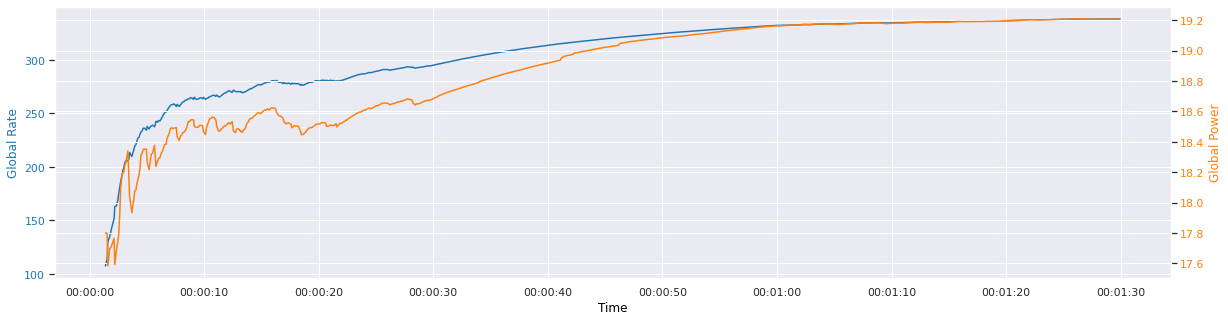

In [53]:
fig, ax1 = plt.subplots(figsize=(20, 5)) 
# plt.plot(df["HB_NUM"], df["HB_RATE"], label="latency")

# plt.plot(df["HB_NUM"], [350]*len(df["HB_NUM"]), label="target")
# plt.plot(df_poet["HB_NUM"].iloc[1:], df_poet["WORKLOAD"].iloc[1:], label="target")
# plt.plot(df.index, df["Global_Power"],label="global")
ax1.plot(df["Timestamp"], df["Global_Rate"],label="Global_Rate",color="tab:blue")
ax1.tick_params(axis ='y', labelcolor = "tab:blue") 
ax1.set_ylabel('Global Rate', color = "tab:blue") 
ax1.set_xlabel('Time', color = "black") 

ax2 = ax1.twinx() 
ax2.plot(df["Timestamp"], df["Global_Power"],label="Global_Power",color="tab:orange")
ax2.tick_params(axis ='y', labelcolor = "tab:orange") 
ax2.set_ylabel('Global Power', color = "tab:orange") 

fig.savefig("test.png")

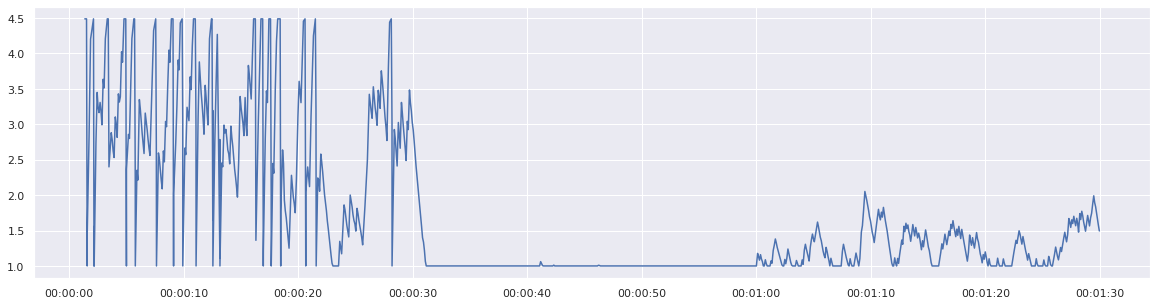

In [51]:
fig, ax1 = plt.subplots(figsize=(20, 5)) 
plt.plot(df["Timestamp"], df["SPEEDUP"], label="SPEEDUP")